# <center> Feature Engineering on preprocessed data (store-sales data) </center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from tqdm.notebook import tqdm as tqdm
import statsmodels.api as sm
import gc
plt.style.use('fivethirtyeight')
from pylab import rcParams
import random
import seaborn as sns
import os

In [2]:
pd. set_option('display.max_rows', None)
pd. set_option('display.max_columns', None)

In [3]:
plt.rcParams['figure.figsize'] = [10, 5]
#plt.rcParams['figure.figsize'] = [18, 8]

In [4]:
# This function will pick a random color for the graph calling this function.This function will pick a random color for the graph calling this function.

def random_color():
    colors = ["blue","black","brown","red","yellow","green","orange","turquoise","magenta","cyan"]
    random.shuffle(colors)
    return colors[0]


In [5]:
ca1 = pd.read_csv('preprocessed_data/CA_1_sales_data.csv')
ca2 = pd.read_csv('preprocessed_data/CA_2_sales_data.csv')
ca3 = pd.read_csv('preprocessed_data/CA_3_sales_data.csv')
ca4 = pd.read_csv('preprocessed_data/CA_4_sales_data.csv')

tx1 = pd.read_csv('preprocessed_data/TX_1_sales_data.csv')
tx2 = pd.read_csv('preprocessed_data/TX_2_sales_data.csv')
tx3 = pd.read_csv('preprocessed_data/TX_3_sales_data.csv')

wi1 = pd.read_csv('preprocessed_data/WI_1_sales_data.csv')
wi2 = pd.read_csv('preprocessed_data/WI_2_sales_data.csv')
wi3 = pd.read_csv('preprocessed_data/WI_3_sales_data.csv')

calendar = pd.read_csv('preprocessed_data/calendar_processed-May-13-2022.csv')
#sell_prices = pd.read_csv('walmart_sales_data/sell_prices.csv')

In [6]:
# renaming 'Unnamed: 0' column to 'date', for better understanding

ca1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
ca2.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
ca3.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
ca4.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
tx1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
tx2.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
tx3.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
wi1.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
wi2.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
wi3.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

In [7]:
ca1.describe()

,wm_yr_wk,wday,month,year,cpi,unemployment_rate,gas_price,snap_ca,ca_walmart,ca_hobbies,ca_household,ca_foods,store_sales,median_price,min_price,max_price
count,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1941.000000,1951.000000,1951.000000,1951.000000
mean,11344.573039,3.997437,6.328549,2013.263455,232.878319,6.955613,3.265579,0.328549,32.819569,22.404516,38.276002,54.286263,4044.195003,3.429321,0.193224,28.664864
std,153.760165,1.999870,3.432454,1.565753,4.662405,1.405855,0.584223,0.469806,10.050487,7.875917,9.389015,10.025150,974.000799,0.072459,0.029737,3.227350
min,11101.000000,1.000000,1.000000,2011.000000,221.187000,4.800000,1.834000,0.000000,5.330000,4.600000,12.000000,24.180000,1941.000000,3.180000,0.010000,20.000000
25%,11218.000000,2.000000,3.000000,2012.000000,228.713000,5.600000,2.863000,0.000000,27.600000,17.100000,31.500000,48.360000,3363.000000,3.380000,0.200000,24.920000
50%,11336.000000,4.000000,6.000000,2013.000000,233.544000,7.200000,3.492000,0.000000,34.020000,21.930000,38.070000,55.380000,3919.000000,3.470000,0.200000,29.970000
75%,11476.500000,6.000000,9.000000,2015.000000,237.336000,8.200000,3.705000,1.000000,39.750000,27.270000,44.720000,61.580000,4653.000000,3.480000,0.200000,30.980000
max,11618.000000,7.000000,12.000000,2016.000000,240.222000,9.100000,4.018000,1.000000,58.000000,57.000000,67.000000,79.000000,6948.000000,3.480000,0.230000,30.980000


In [8]:
ca2.head()

,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,cpi,unemployment_rate,gas_price,snap_ca,ca_walmart,ca_hobbies,ca_household,ca_foods,store_sales,median_price,min_price,max_price
0,2011-01-29,11101,1,1,2011,None,None,None,None,221.187,9.1,3.163,0,39.50,20.14,36.5,63.00,3494.0,3.27,0.2,20.0
1,2011-01-30,11101,2,1,2011,None,None,None,None,221.187,9.1,3.163,0,42.50,30.02,29.0,67.90,3046.0,3.27,0.2,20.0
2,2011-01-31,11101,3,1,2011,None,None,None,None,221.187,9.1,3.155,0,36.50,22.42,48.0,60.90,2121.0,3.27,0.2,20.0
3,2011-02-01,11101,4,2,2011,None,None,None,None,221.898,9.0,3.155,1,42.40,19.08,38.5,62.70,2324.0,3.27,0.2,20.0
4,2011-02-02,11101,5,2,2011,None,None,None,None,221.898,9.0,3.155,1,38.69,21.96,35.2,57.42,1942.0,3.27,0.2,20.0


## <CENTER >OUTLIERS </CENTER>

Outliers in a collection of data are the values which are far away from most other points. We use boxplot to visualize a dataset for spotting unusual data points.


You may run the analysis both with and without it, but you should state in at least a footnote the dropping of any such data points and how the results changed. STL-decomposition plot

### CA1

In [9]:
ca1['store_sales'].describe()

count    1941.000000
mean     4044.195003
std       974.000799
min      1941.000000
25%      3363.000000
50%      3919.000000
75%      4653.000000
max      6948.000000
Name: store_sales, dtype: float64

In [10]:
print("Skewness: %f" % ca1['store_sales'].skew()) 
print("Kurtosis: %f" % ca1['store_sales'].kurt())

Skewness: 0.450569
Kurtosis: -0.339506


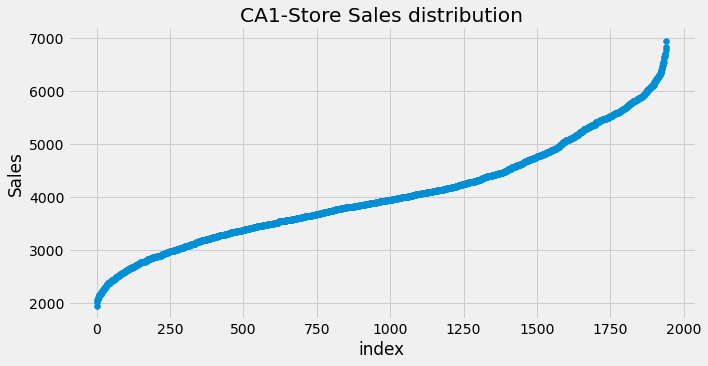

In [11]:
plt.scatter(range(ca1.shape[0]), np.sort(ca1['store_sales'].values))
plt.xlabel('index')
plt.ylabel('Sales')
plt.title("CA1-Store Sales distribution")
sns.despine()

In [12]:
# select columns by name
df1 = ca1.filter(items=['ca_walmart', 'ca_hobbies', 'ca_household', 'ca_foods'])
df_melted1 = pd.melt(df1)

df2 = tx1.filter(items=['tx_walmart', 'tx_hobbies', 'tx_household', 'tx_foods'])
df_melted2 = pd.melt(df2)

df3 = wi1.filter(items=['wi_walmart', 'wi_hobbies', 'wi_household', 'wi_foods'])
df_melted3 = pd.melt(df3)


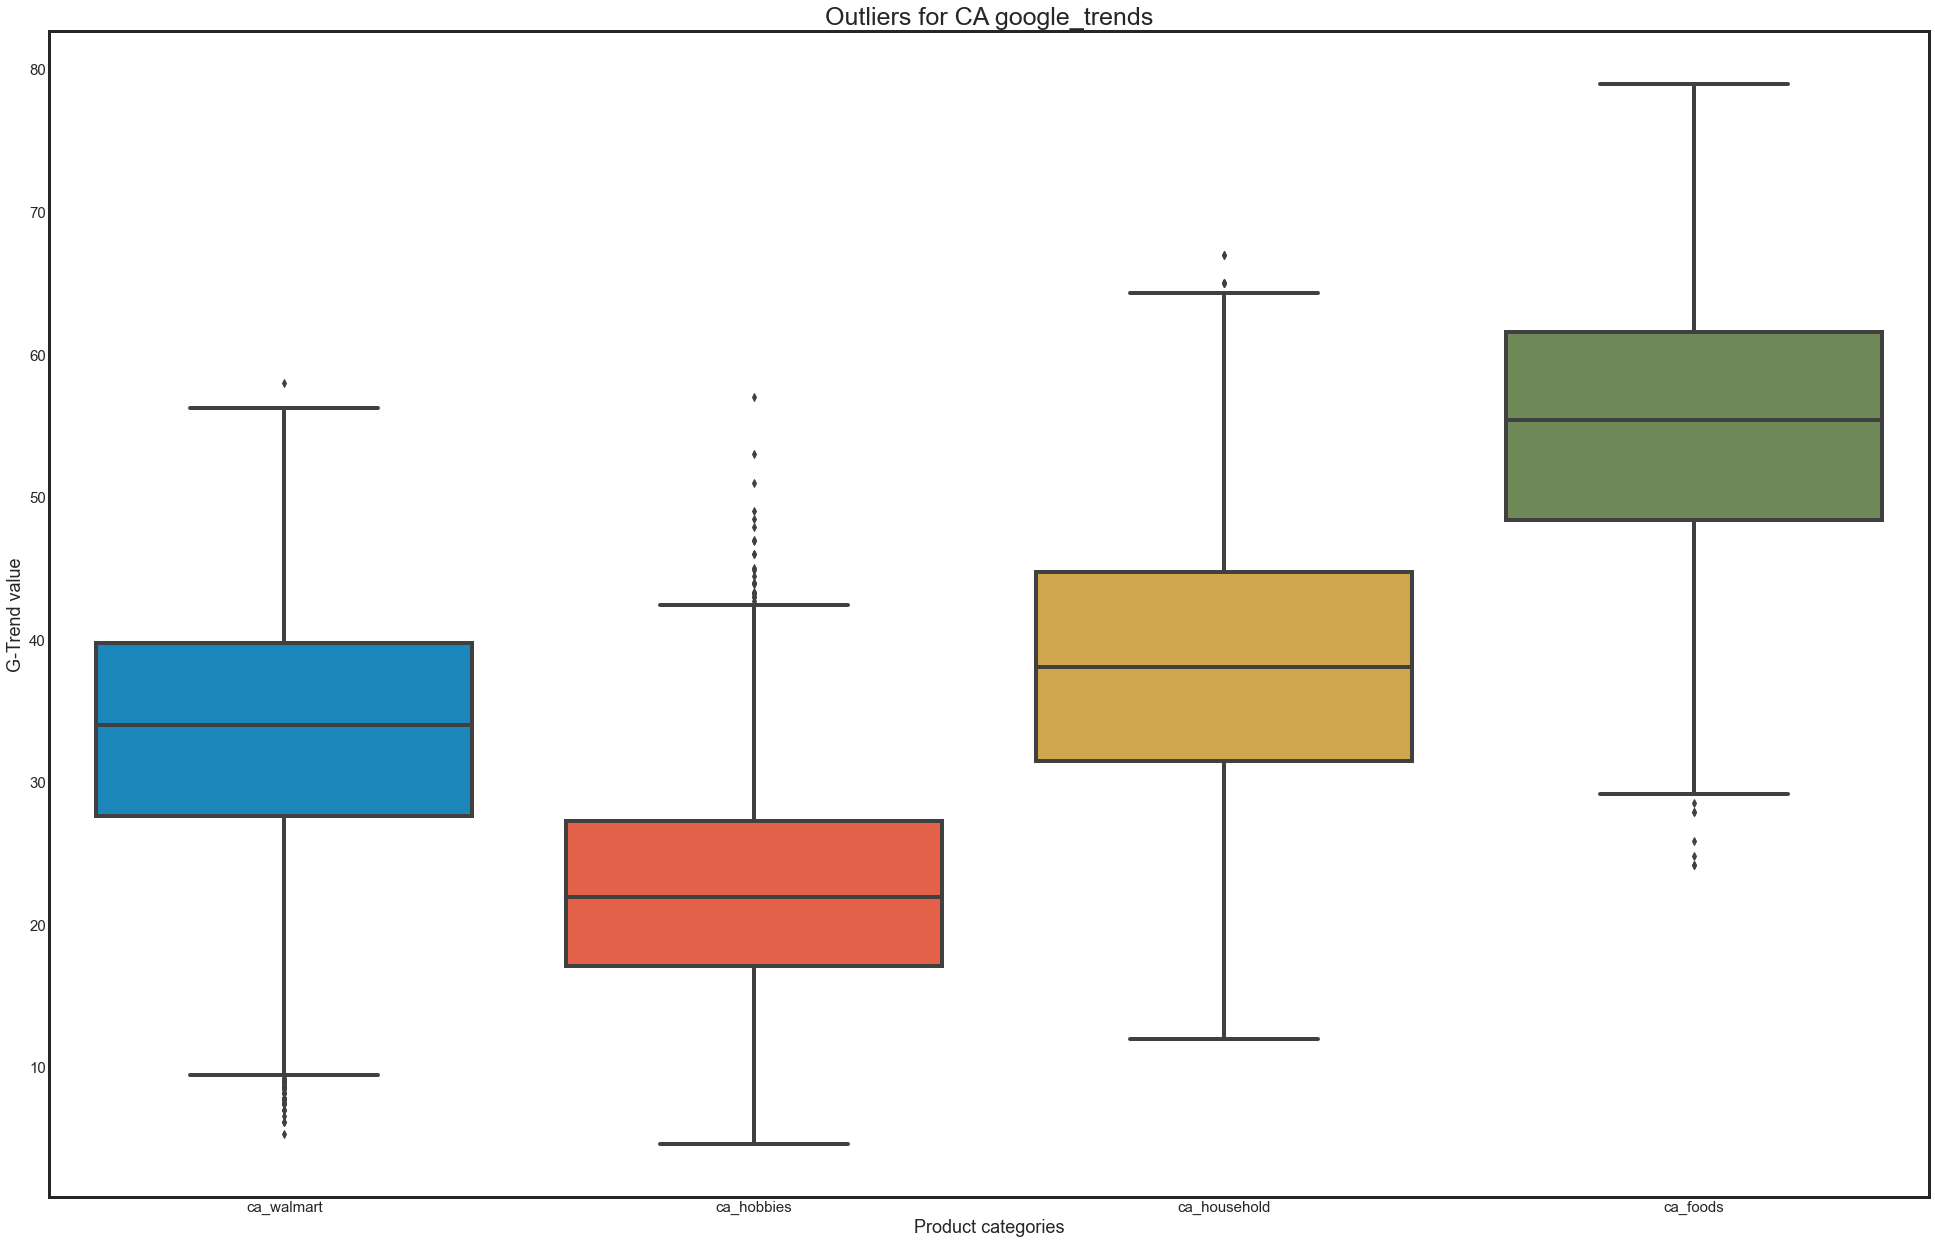

In [18]:
#boxplots by group
s1 = sns.boxplot(x='variable', y='value', data=df_melted1)
s1.set_title('Outliers for CA google_trends', fontsize=25)
s1.set_xlabel("Product categories",fontsize=18)
s1.set_ylabel("G-Trend value",fontsize=18)
s1.tick_params(labelsize=15)

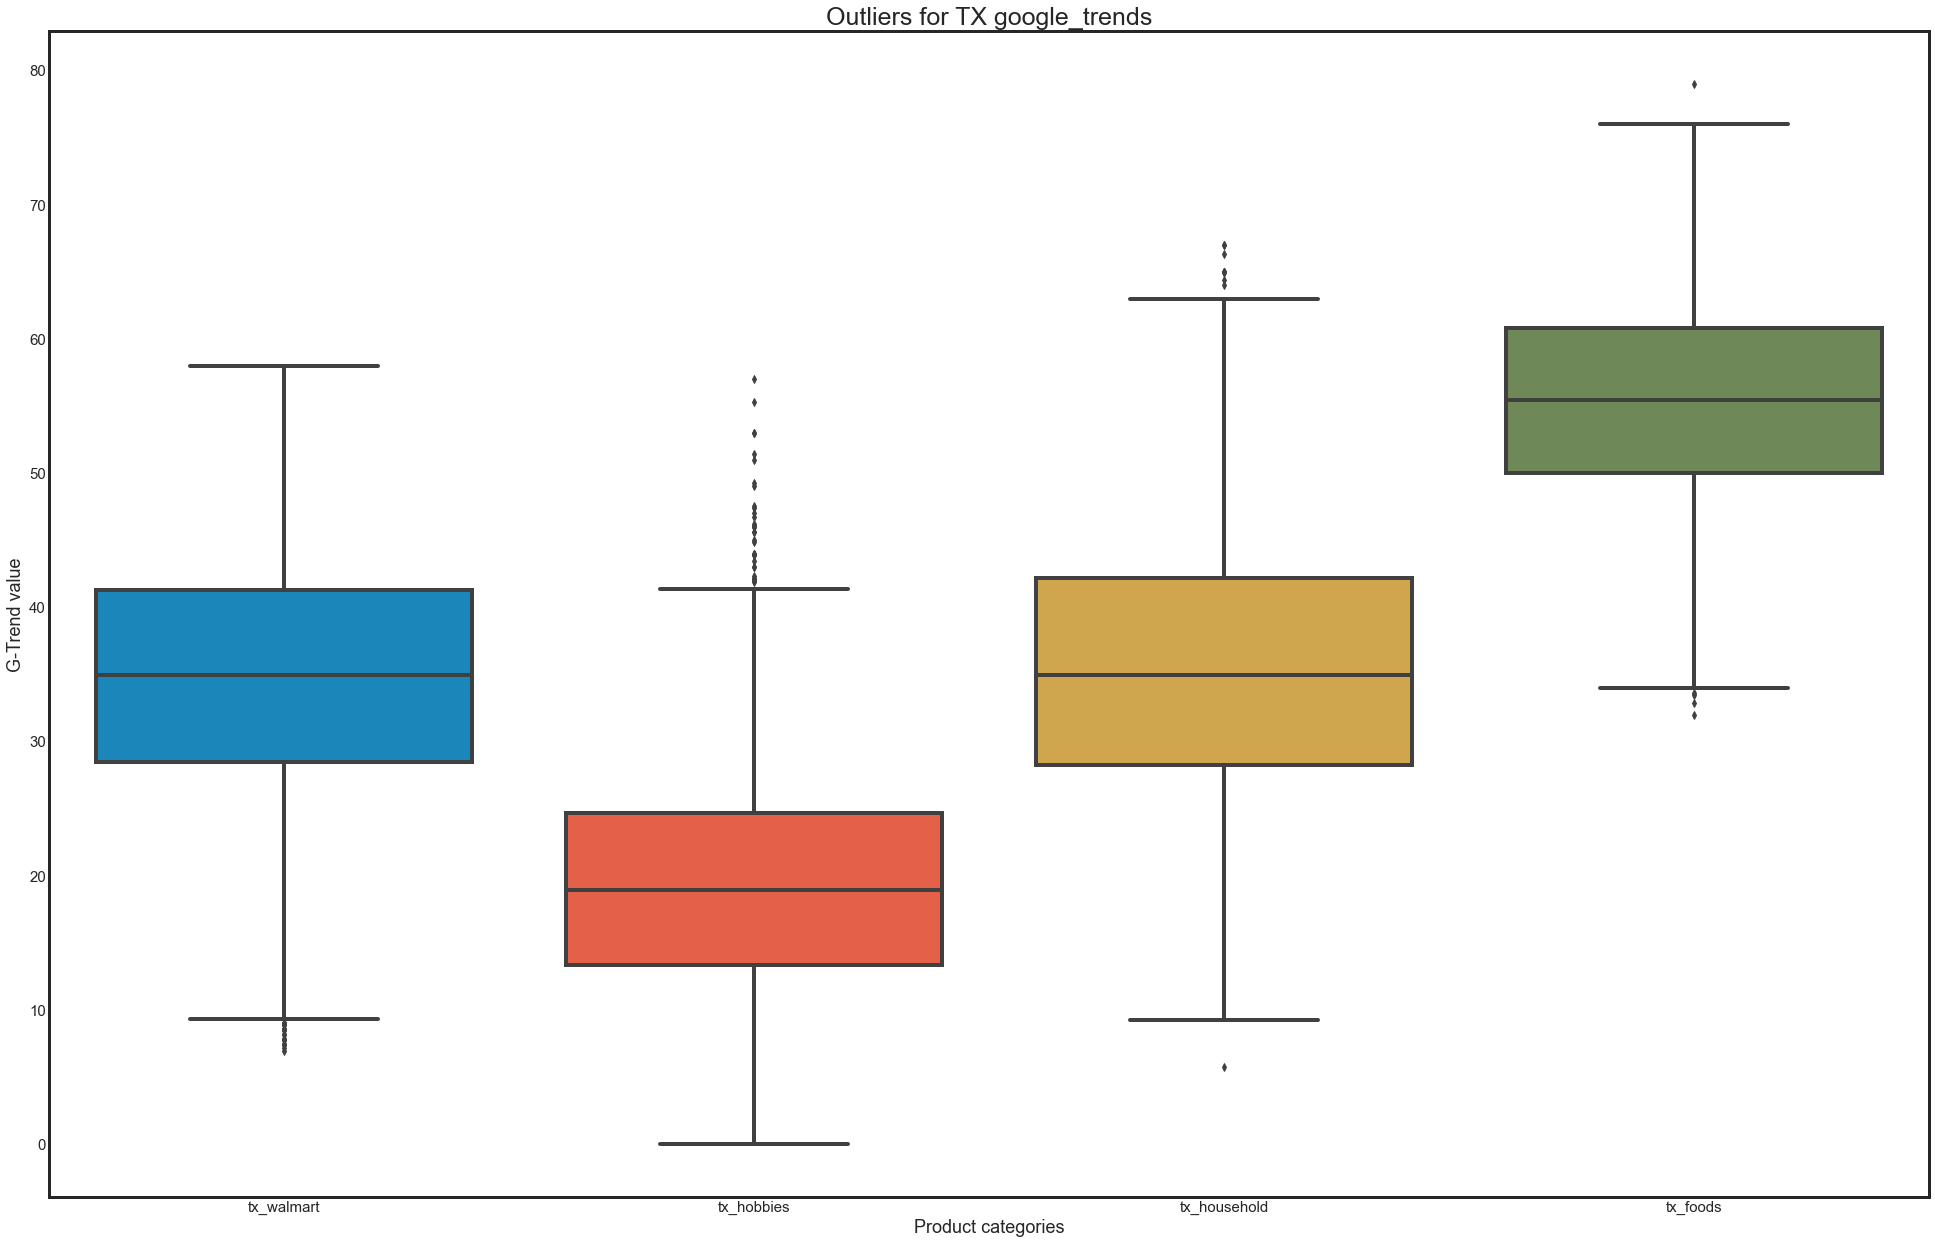

In [19]:
#boxplots by group
s2 = sns.boxplot(x='variable', y='value', data=df_melted2)
s2.set_title('Outliers for TX google_trends', fontsize=25)
s2.set_xlabel("Product categories",fontsize=18)
s2.set_ylabel("G-Trend value",fontsize=18)
s2.tick_params(labelsize=15)

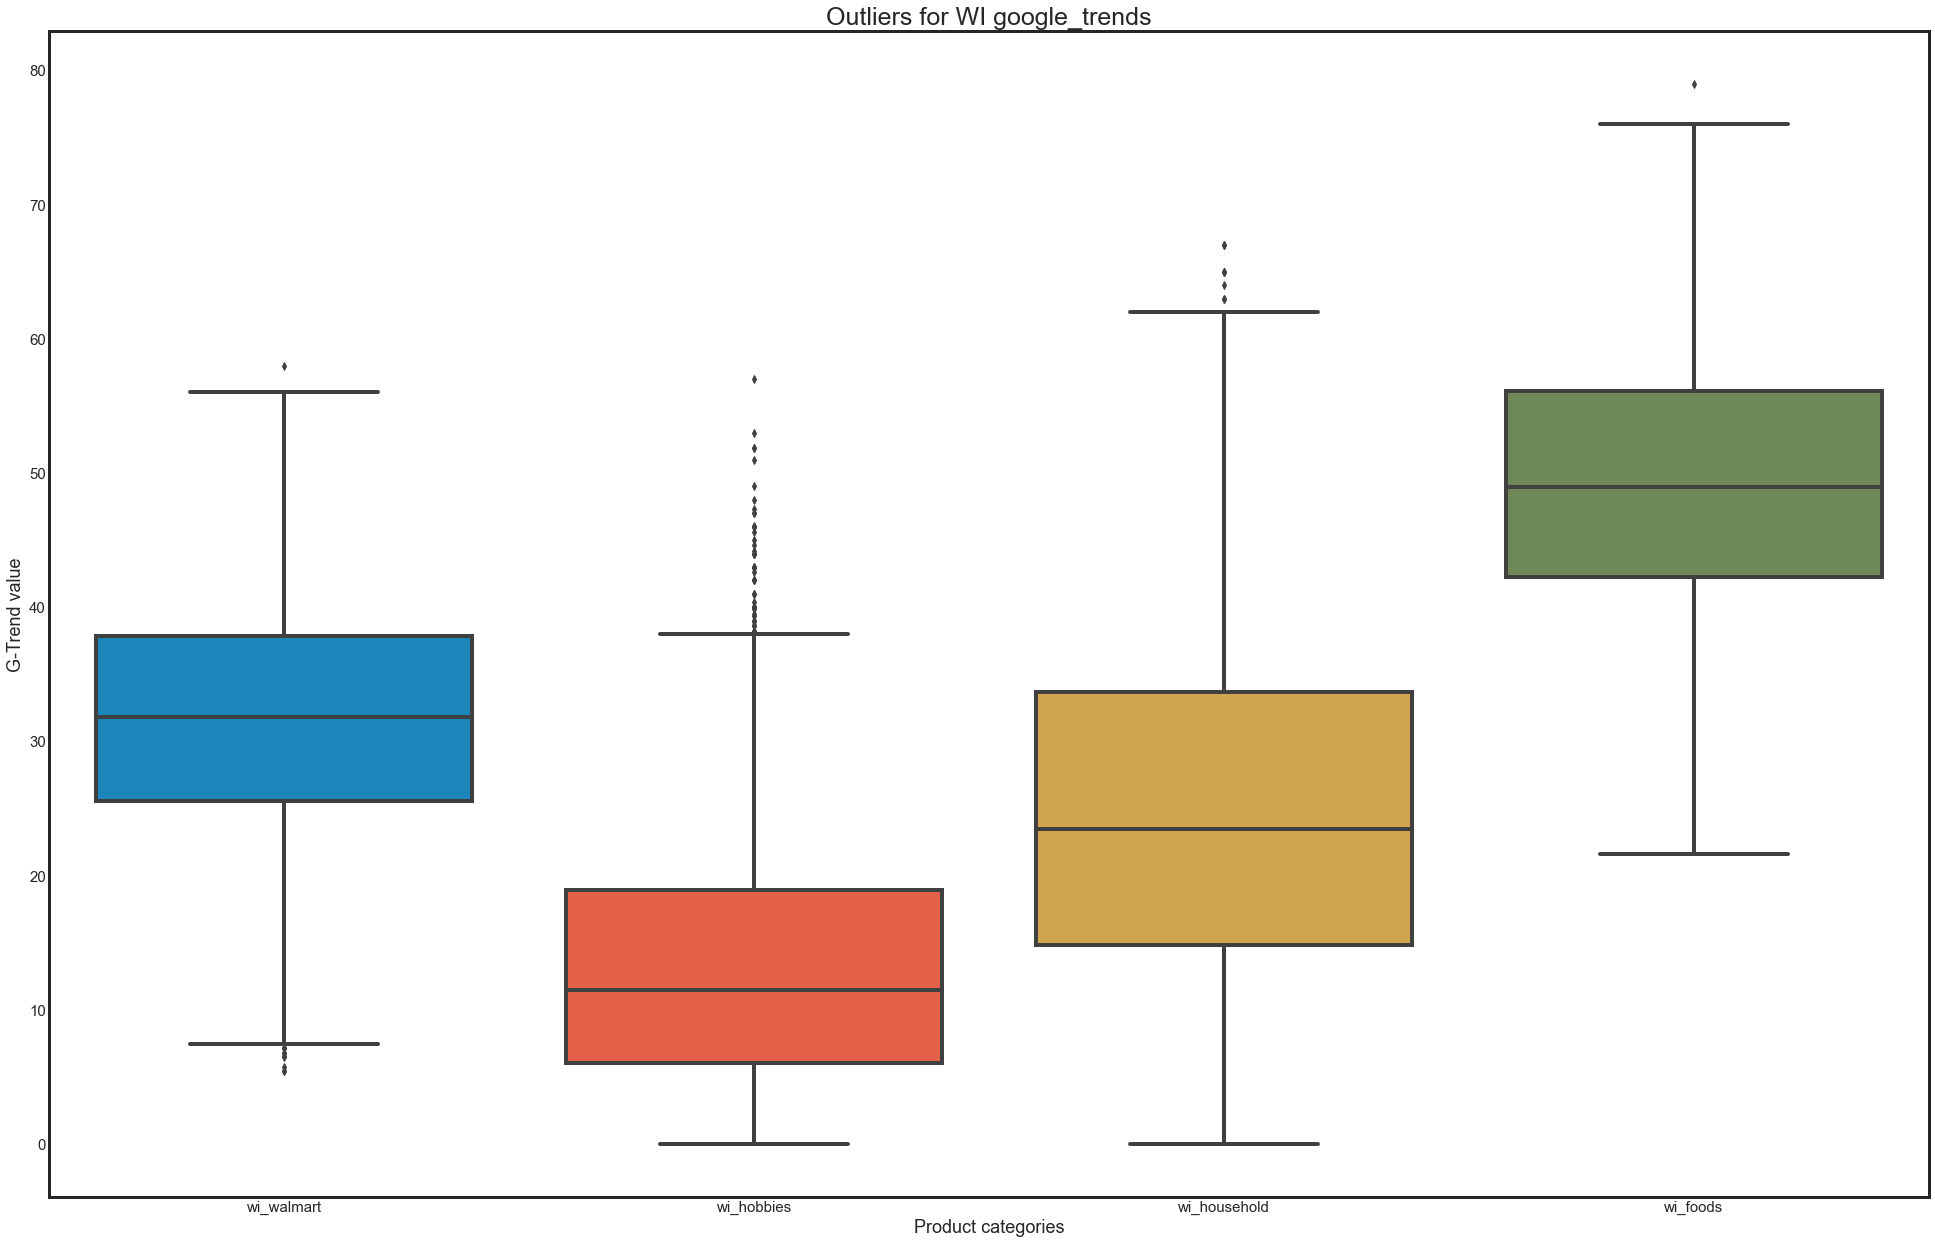

In [20]:
#boxplots by group
s3 = sns.boxplot(x='variable', y='value', data=df_melted3)
s3.set_title('Outliers for WI google_trends', fontsize=25)
s3.set_xlabel("Product categories",fontsize=18)
s3.set_ylabel("G-Trend value",fontsize=18)
s3.tick_params(labelsize=15)

/Users/kriti/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kriti/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kriti/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

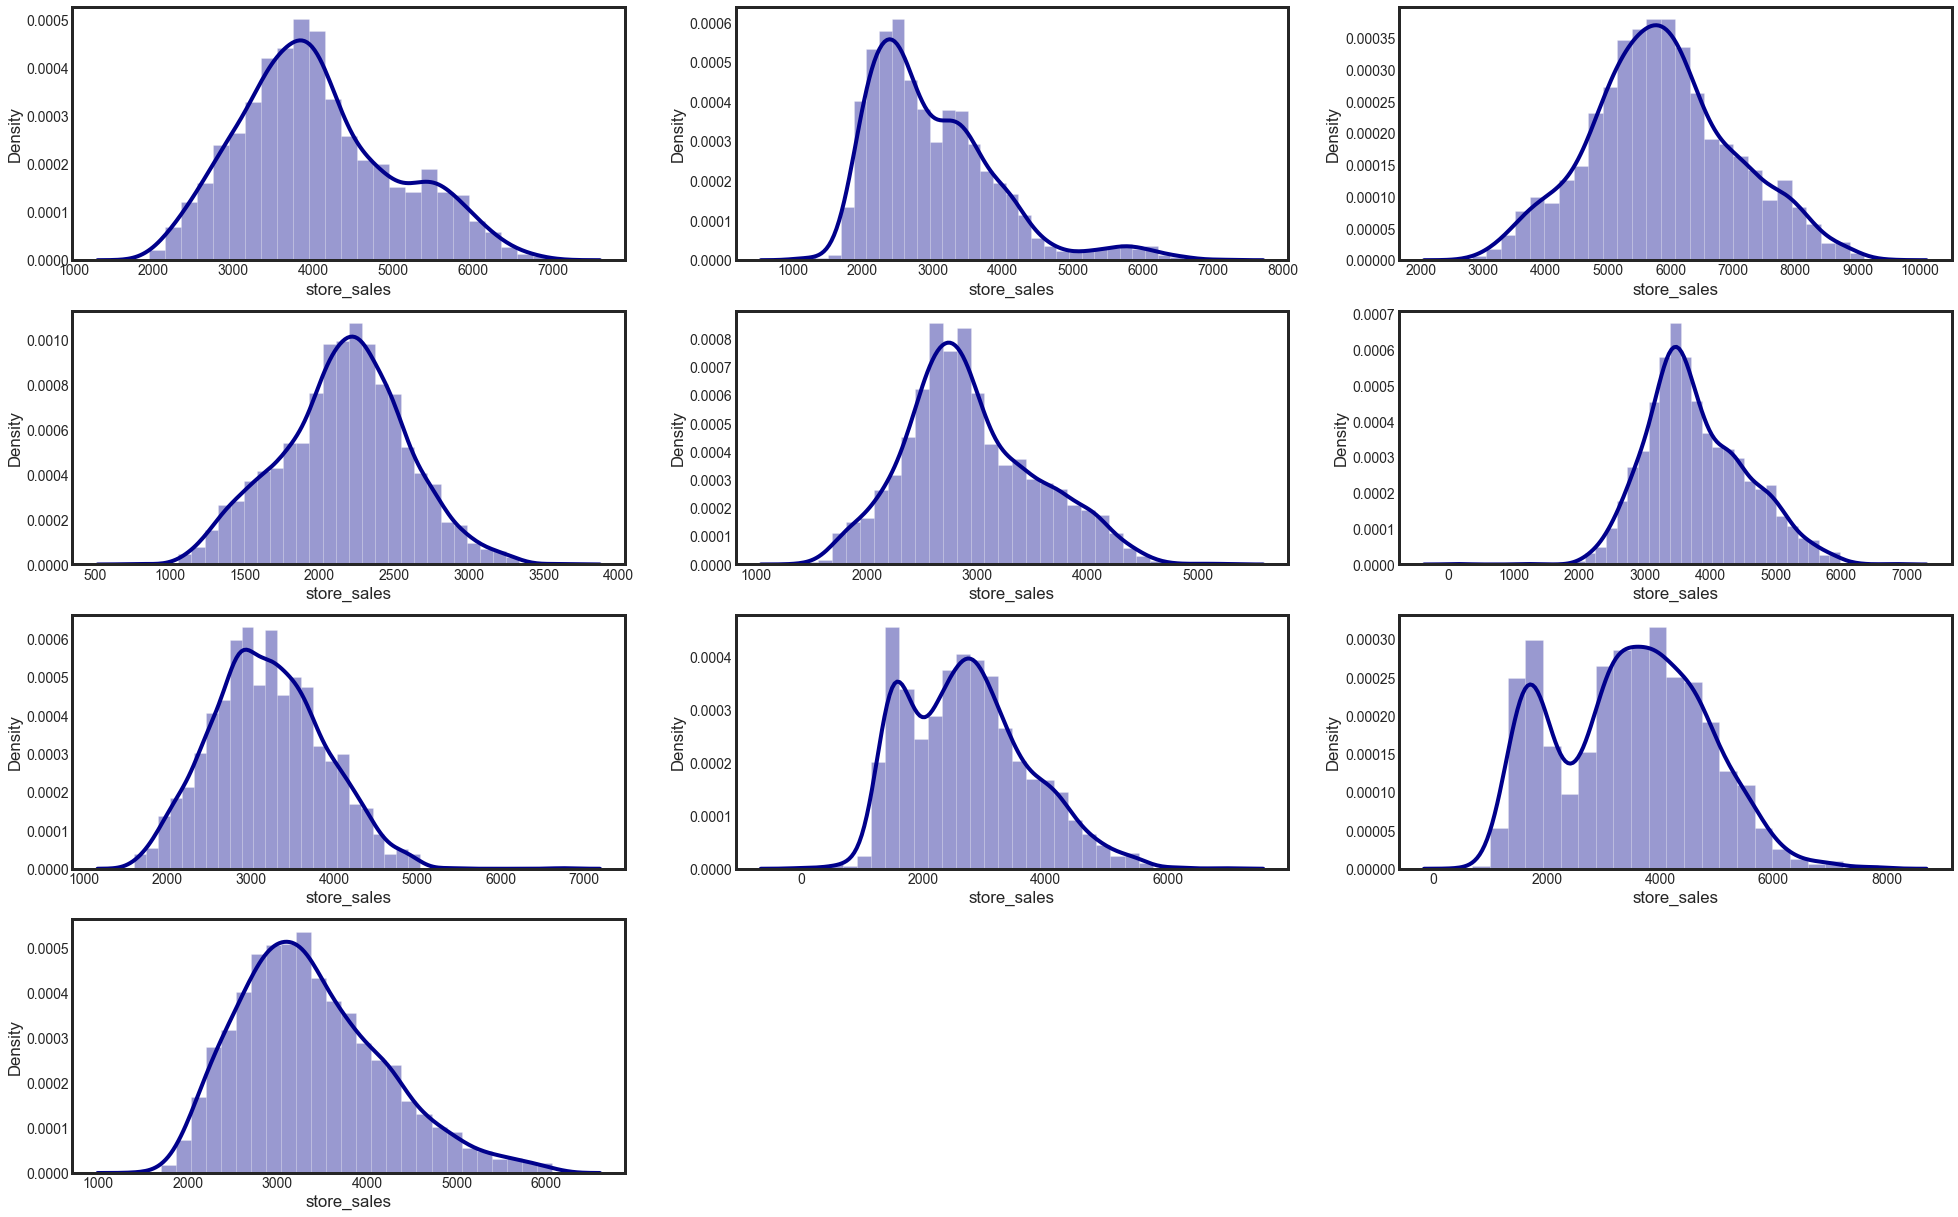

In [21]:
plt.rcParams['figure.figsize'] = [30,20]
f = plt.figure()
li = [ca1, ca2, ca3, ca4, tx1, tx2, tx3, wi1, wi2, wi3]
for i,df in enumerate(li):
    f.add_subplot(4, 3, i+1)
    sns.distplot(df['store_sales'], color = 'darkblue')
plt.show()

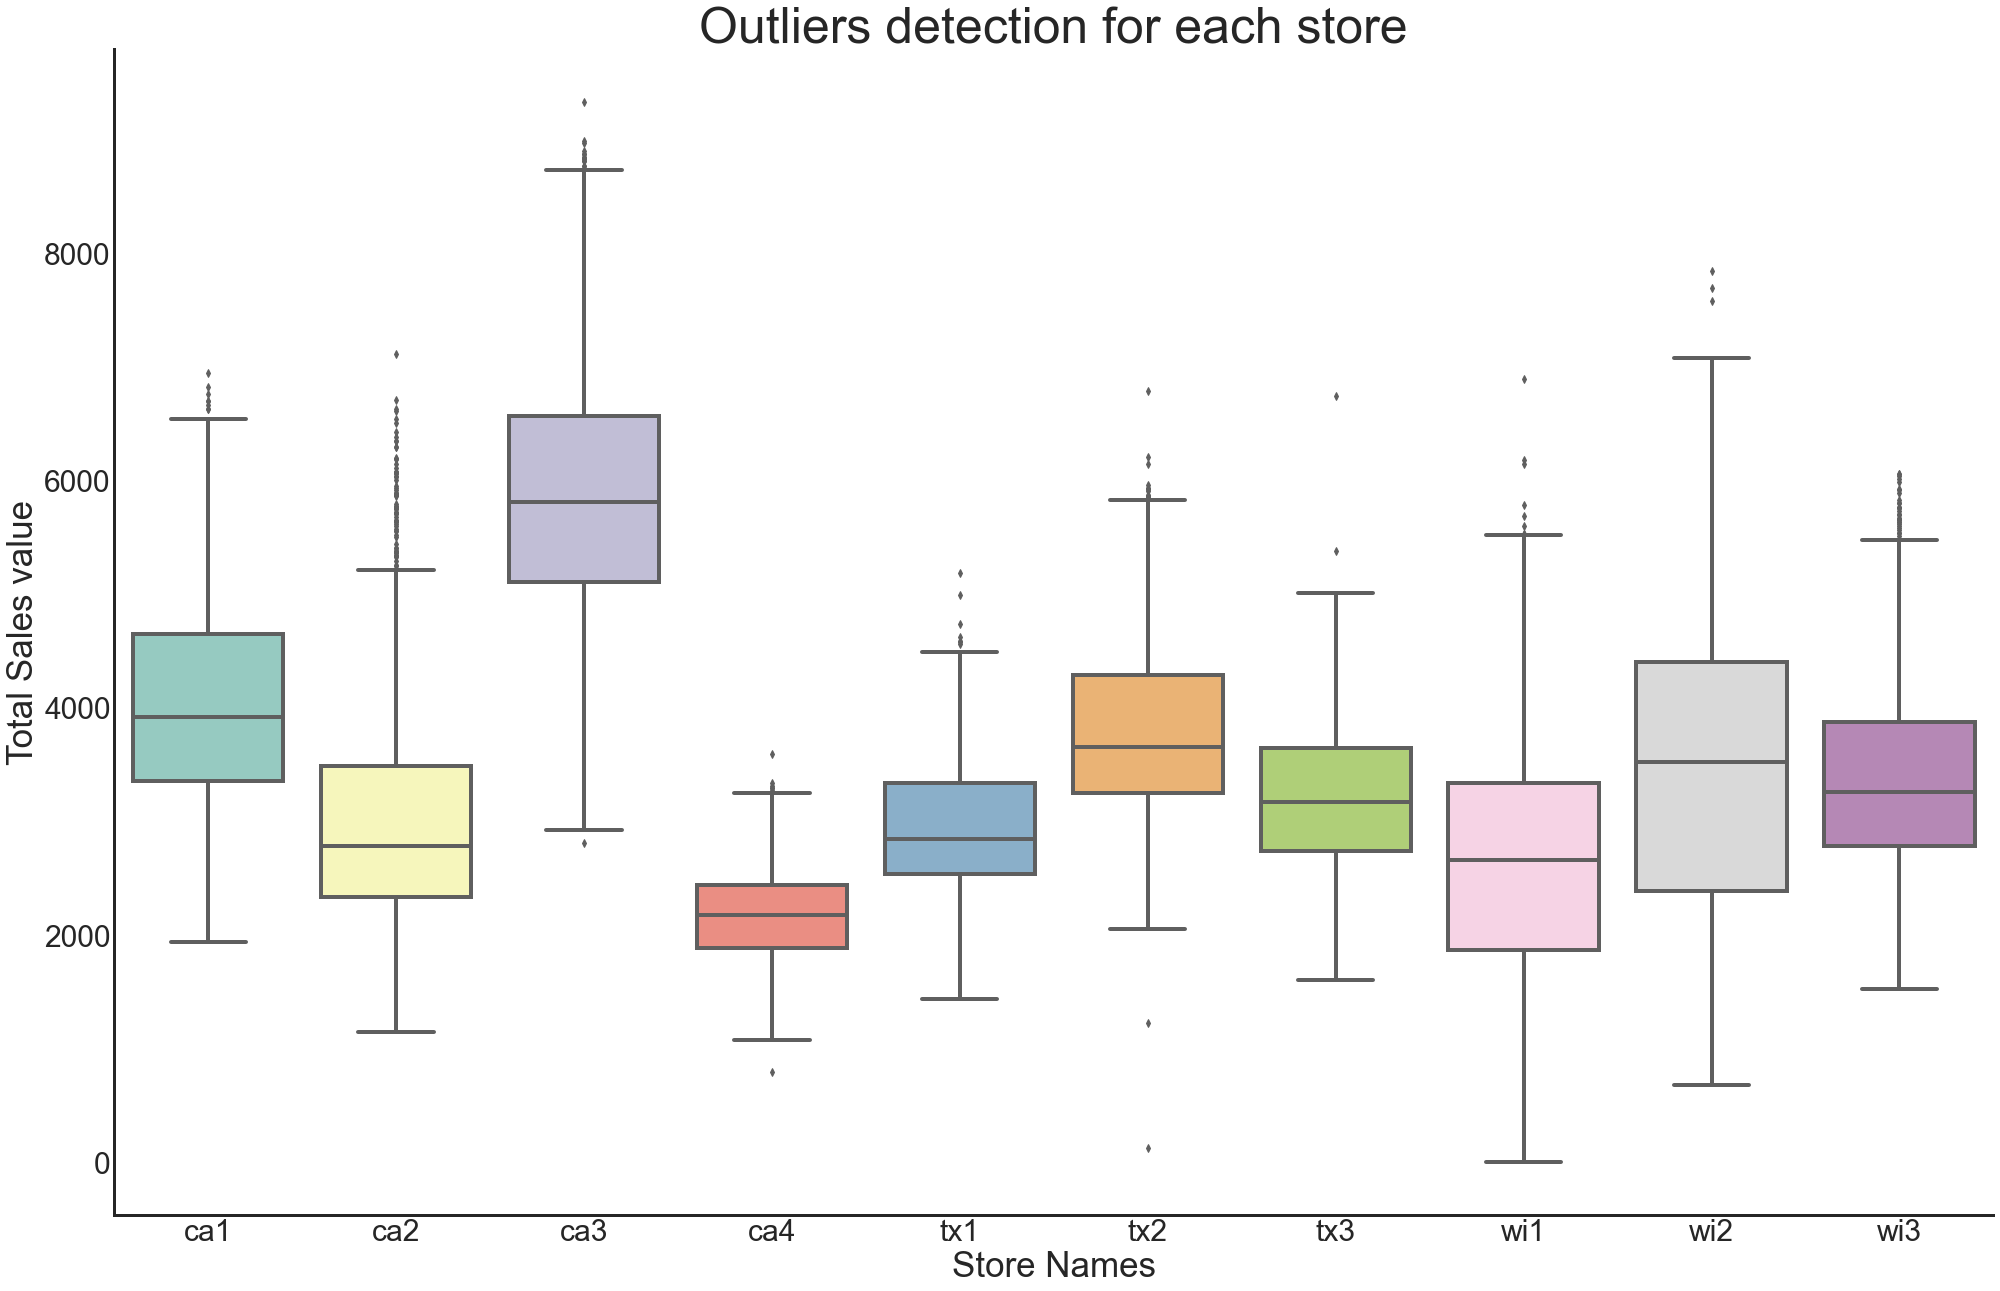

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

dfs = pd.DataFrame({'ca1': ca1['store_sales'],
                             'ca2': ca2['store_sales'],
                             'ca3': ca3['store_sales'],
                             'ca4': ca4['store_sales'],
                             'tx1': tx1['store_sales'],
                             'tx2': tx2['store_sales'],
                             'tx3': tx3['store_sales'],
                             'wi1': wi1['store_sales'],
                             'wi2': wi2['store_sales'],
                             'wi3': wi3['store_sales']})

sns.set_style('white')
b = sns.boxplot(data= dfs, palette="Set3")
b.axes.set_title("Outliers detection for each store",fontsize=50)
b.set_xlabel("Store Names",fontsize=35)
b.set_ylabel("Total Sales value",fontsize=35)
b.tick_params(labelsize=30)
sns.despine()
plt.show()


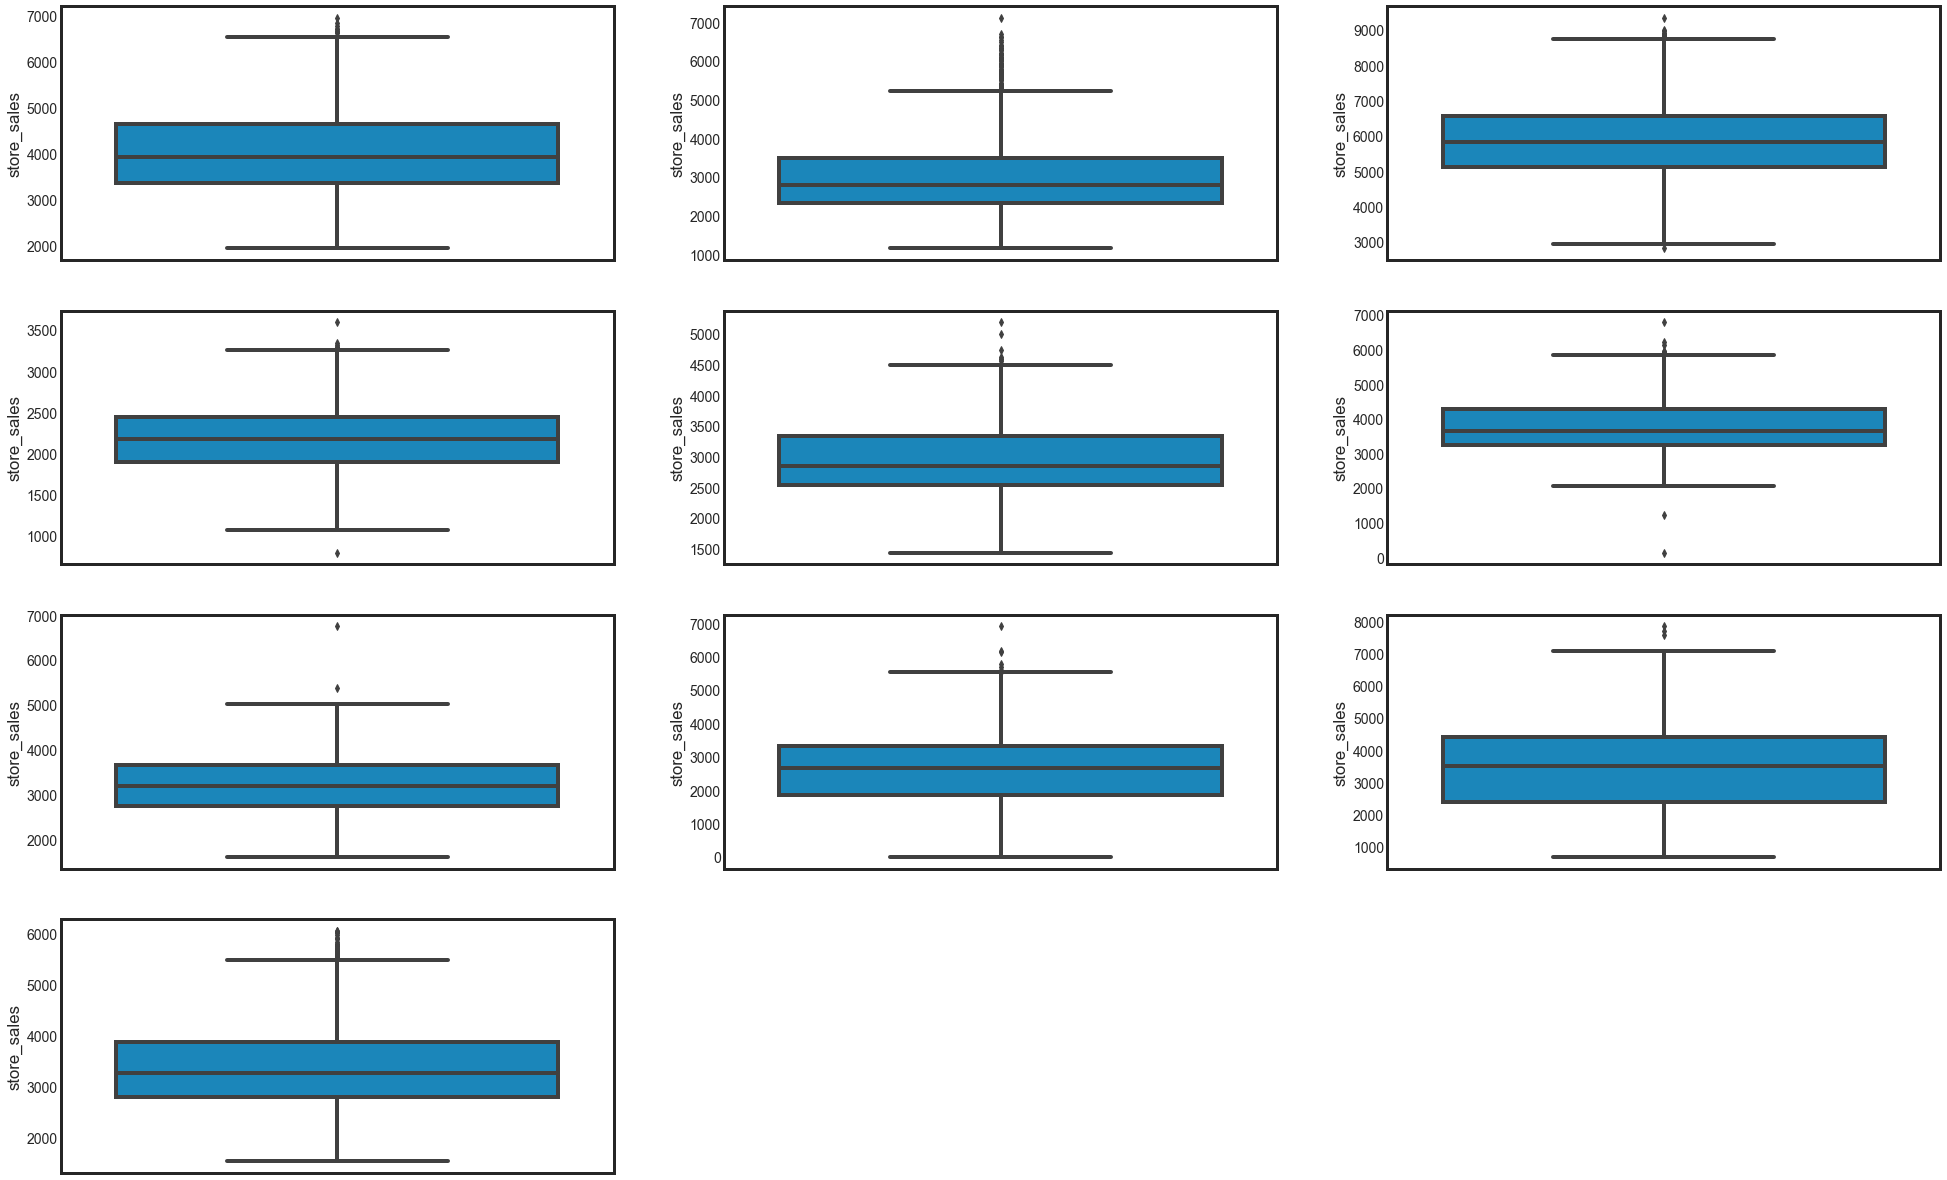

In [23]:
#plot these boxplot in one figure for comparision.

plt.rcParams['figure.figsize'] = [30,20]
f = plt.figure()
li = [ca1, ca2, ca3, ca4, tx1, tx2, tx3, wi1, wi2, wi3]
for i,df in enumerate(li):
    f.add_subplot(4, 3, i+1)
    sns.boxplot(y='store_sales', data=df)
plt.show()

In [24]:
# function to find the number of outliers in the column
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    
    return outliers

In [25]:
outliers = find_outliers_IQR(ca1['store_sales'])
print('outliers for CA1 store_sales')
print('number of outliers: ', len(outliers))
print('max outlier value : ', outliers.max())
print('min outlier value : ', outliers.min())
outliers = find_outliers_IQR(ca2['store_sales'])
print('outliers for CA2 store_sales')
print('number of outliers: ', len(outliers))
print('max outlier value : ', outliers.max())
print('min outlier value : ', outliers.min())
outliers = find_outliers_IQR(ca3['store_sales'])
print('outliers for CA3 store_sales')
print('number of outliers: ', len(outliers))
print('max outlier value : ', outliers.max())
print('min outlier value : ', outliers.min())
outliers = find_outliers_IQR(ca4['store_sales'])
print('outliers for CA4 store_sales')
print('number of outliers: ', len(outliers))
print('max outlier value : ', outliers.max())
print('min outlier value : ', outliers.min())

outliers1 = find_outliers_IQR(tx1['store_sales'])
print('\noutliers for TX1 store_sales')
print('number of outliers: ', len(outliers1))
print('max outlier value : ', outliers1.max())
print('min outlier value : ', outliers1.min())
outliers1 = find_outliers_IQR(tx2['store_sales'])
print('outliers for TX2 store_sales')
print('number of outliers: ', len(outliers1))
print('max outlier value : ', outliers1.max())
print('min outlier value : ', outliers1.min())
outliers1 = find_outliers_IQR(tx3['store_sales'])
print('outliers for TX3 store_sales')
print('number of outliers: ', len(outliers1))
print('max outlier value : ', outliers1.max())
print('min outlier value : ', outliers1.min())

outliers2 = find_outliers_IQR(wi1['store_sales'])
print('\noutliers for WI1 store_sales')
print('number of outliers: ', len(outliers2))
print('max outlier value : ', outliers2.max())
print('min outlier value : ', outliers2.min())
outliers2 = find_outliers_IQR(wi2['store_sales'])
print('outliers for WI2 store_sales')
print('number of outliers: ', len(outliers2))
print('max outlier value : ', outliers2.max())
print('min outlier value : ', outliers2.min())
outliers2 = find_outliers_IQR(wi3['store_sales'])
print('outliers for WI3 store_sales')
print('number of outliers: ', len(outliers2))
print('max outlier value : ', outliers2.max())
print('min outlier value : ', outliers2.min())

outliers for CA1 store_sales
number of outliers:  8
max outlier value :  6948.0
min outlier value :  6630.0
outliers for CA2 store_sales
number of outliers:  73
max outlier value :  7120.0
min outlier value :  5255.0
outliers for CA3 store_sales
number of outliers:  14
max outlier value :  9338.0
min outlier value :  2814.0
outliers for CA4 store_sales
number of outliers:  8
max outlier value :  3597.0
min outlier value :  794.0

outliers for TX1 store_sales
number of outliers:  7
max outlier value :  5190.0
min outlier value :  4561.0
outliers for TX2 store_sales
number of outliers:  14
max outlier value :  6793.0
min outlier value :  131.0
outliers for TX3 store_sales
number of outliers:  2
max outlier value :  6750.0
min outlier value :  5383.0

outliers for WI1 store_sales
number of outliers:  8
max outlier value :  6902.0
min outlier value :  5538.0
outliers for WI2 store_sales
number of outliers:  3
max outlier value :  7852.0
min outlier value :  7586.0
outliers for WI3 store_sa

## Dealing with Outliers

In [26]:
lower_limit = ca1['store_sales'].quantile(0.03)  
upper_limit = ca1['store_sales'].quantile(0.97)

print(lower_limit)
print(upper_limit)

2443.4
6039.4


In [27]:
lower_limit = ca1['store_sales'].mean() - (3 * ca1['store_sales'].std())
upper_limit = ca1['store_sales'].mean() + (3 * ca1['store_sales'].std())

print(lower_limit)
print(upper_limit)

1122.1926048429614
6966.197400309022


In [29]:
import numpy as np
ca1['store_sales'].quantile([0.01, 0.99]).values

array([2223.8, 6334.6])

In [30]:
def treatoutliers(df=None, col=None, treament=None):
    percentiles = df[col].quantile([0.01, 0.99]).values
    if treament == 'remove':
        df = df[(df[col] >= percentiles[0]) & (df[col] <=  percentiles[1])]
    elif treament == 'cap':   
        df[col] = np.clip(df[col], percentiles[0], percentiles[1])
    return df   

In [31]:
ca1['store_sales'].quantile([0.01, 0.99]).values

array([2223.8, 6334.6])

In [42]:
print('Maximum store slaes:', ca1['store_sales'].max())
print('Minimum store sales:', ca1['store_sales'].min())

Maximum store slaes: 6331.46656
Minimum store sales: 2232.67808


### Capping outliers 

In [38]:
ca1_clean = treatoutliers(ca1, 'store_sales' , 'cap')
ca1_clean.head()

,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,cpi,unemployment_rate,gas_price,snap_ca,ca_walmart,ca_hobbies,ca_household,ca_foods,store_sales,median_price,min_price,max_price
0,2011-01-29,11101,1,1,2011,None,None,None,None,221.187,9.1,3.163,0,39.50,20.14,36.5,63.00,4337.0,3.18,0.2,20.0
1,2011-01-30,11101,2,1,2011,None,None,None,None,221.187,9.1,3.163,0,42.50,30.02,29.0,67.90,4155.0,3.18,0.2,20.0
2,2011-01-31,11101,3,1,2011,None,None,None,None,221.187,9.1,3.155,0,36.50,22.42,48.0,60.90,2816.0,3.18,0.2,20.0
3,2011-02-01,11101,4,2,2011,None,None,None,None,221.898,9.0,3.155,1,42.40,19.08,38.5,62.70,3051.0,3.18,0.2,20.0
4,2011-02-02,11101,5,2,2011,None,None,None,None,221.898,9.0,3.155,1,38.69,21.96,35.2,57.42,2630.0,3.18,0.2,20.0


In [45]:
ca1_clean.shape

(1951, 21)

In [34]:
ca2_clean = treatoutliers(ca2, 'store_sales' , 'cap')
ca3_clean = treatoutliers(ca3, 'store_sales' , 'cap')
ca4_clean = treatoutliers(ca4, 'store_sales' , 'cap')
tx1_clean = treatoutliers(tx1, 'store_sales' , 'cap')
tx2_clean = treatoutliers(tx2, 'store_sales' , 'cap')
tx3_clean = treatoutliers(tx3, 'store_sales' , 'cap')
wi1_clean = treatoutliers(wi1, 'store_sales' , 'cap')
wi2_clean = treatoutliers(wi2, 'store_sales' , 'cap')
wi3_clean = treatoutliers(wi3, 'store_sales' , 'cap')

In [51]:
#Saving these new dataframes
import os

outdir = './capped_outliers'
if not os.path.exists(outdir):
    os.mkdir(outdir)

#fullname = os.path.join(outdir, outname)    
ca1_clean.to_csv('capped_outliers/ca1.csv', index = False)
ca2_clean.to_csv('capped_outliers/ca2.csv', index = False)
ca3_clean.to_csv('capped_outliers/ca3.csv', index = False)
ca4_clean.to_csv('capped_outliers/ca4.csv', index = False)
tx1_clean.to_csv('capped_outliers/tx1.csv', index = False)
tx2_clean.to_csv('capped_outliers/tx2.csv', index = False)
tx3_clean.to_csv('capped_outliers/tx3.csv', index = False)
wi1_clean.to_csv('capped_outliers/wi1.csv', index = False)
wi2_clean.to_csv('capped_outliers/wi2.csv', index = False)
wi3_clean.to_csv('capped_outliers/wi3.csv', index = False)

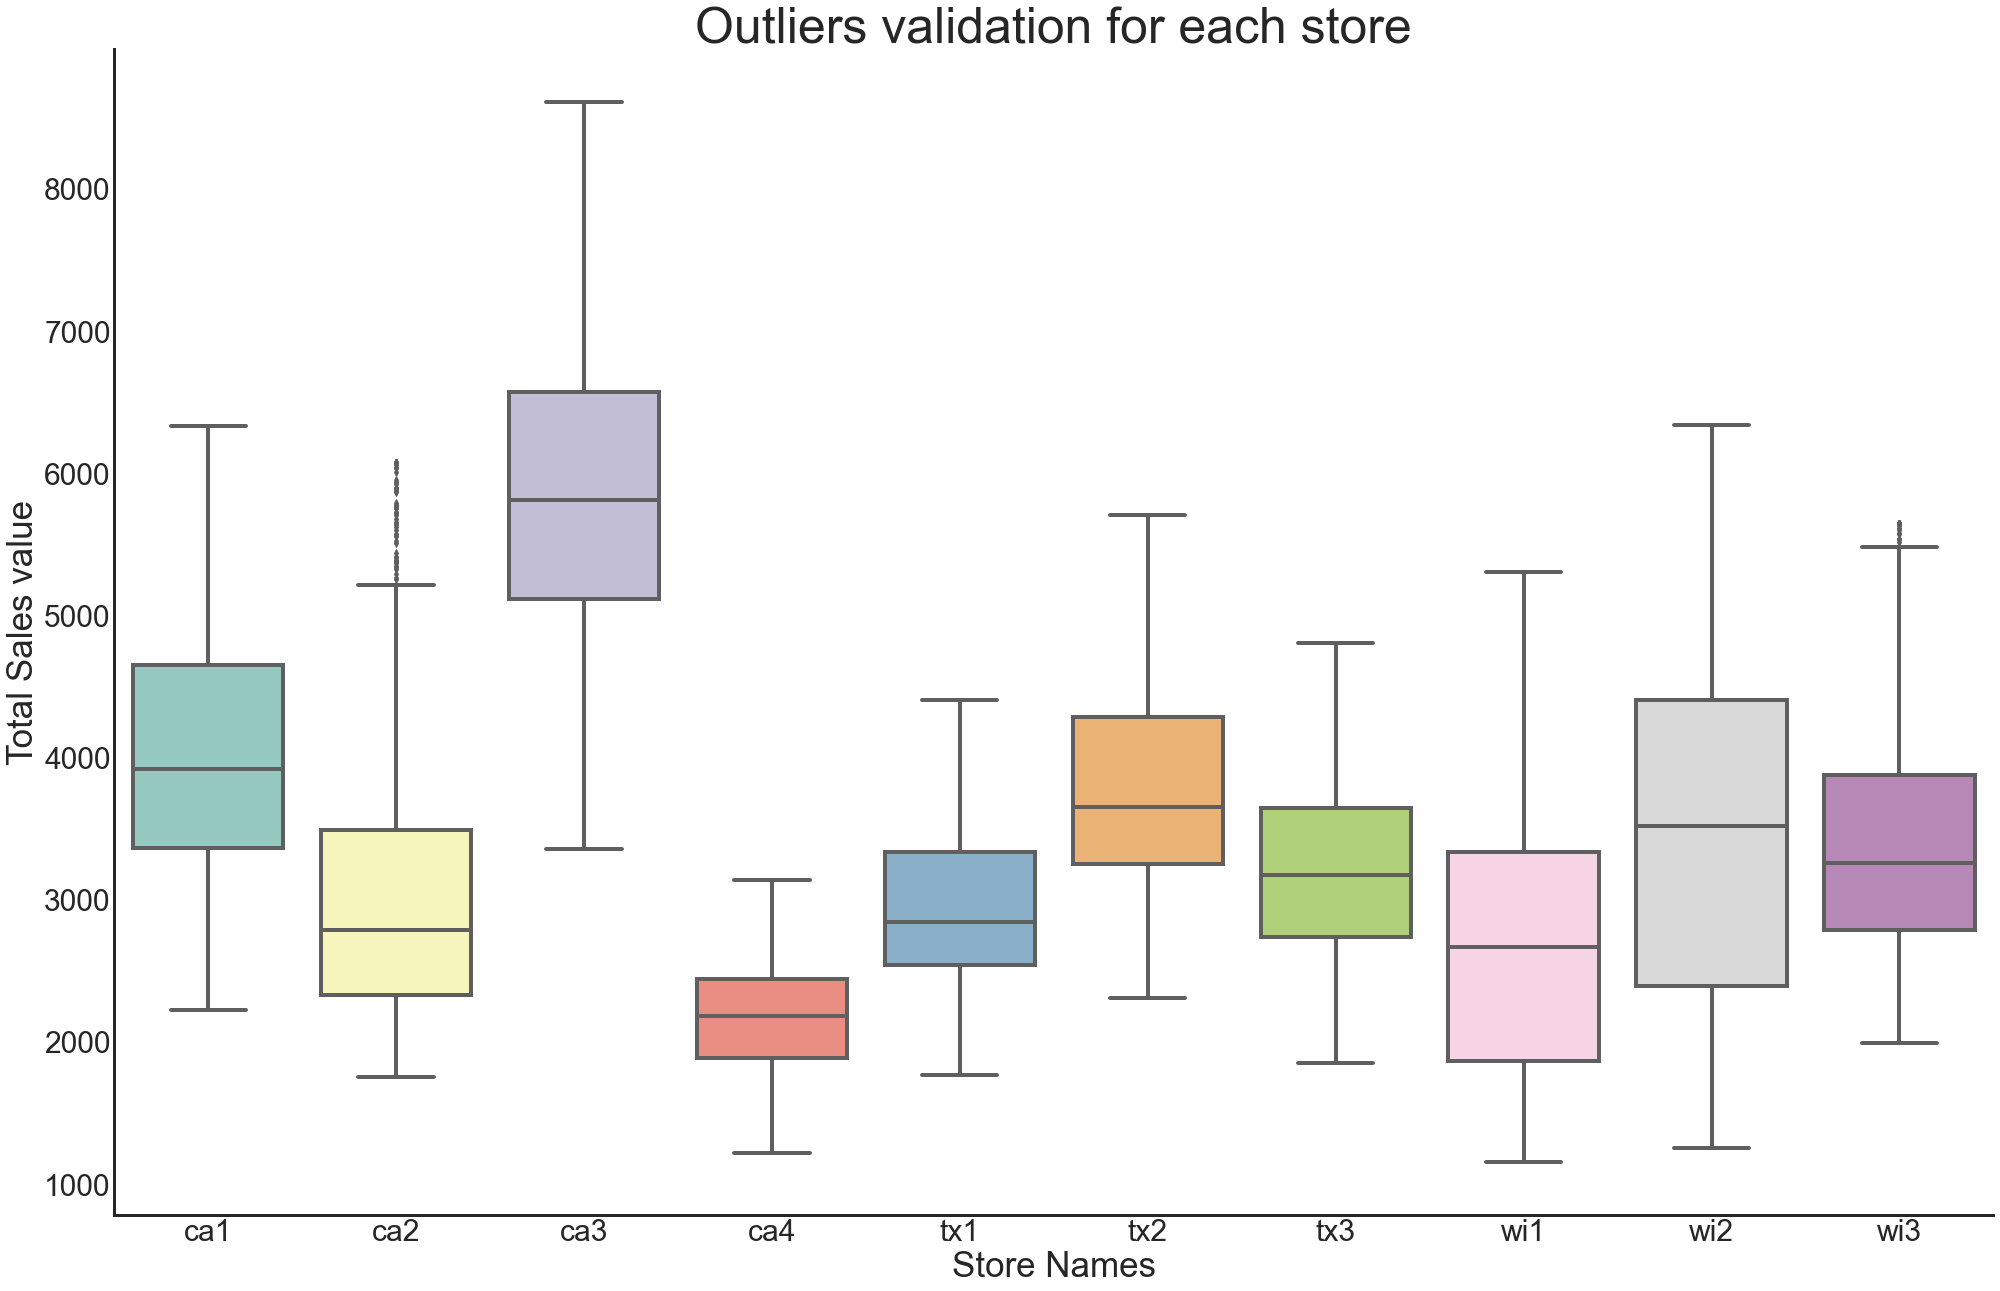

In [39]:
clean_dfs = pd.DataFrame({'ca1': ca1_clean['store_sales'],
                             'ca2': ca2_clean['store_sales'],
                             'ca3': ca3_clean['store_sales'],
                             'ca4': ca4_clean['store_sales'],
                             'tx1': tx1_clean['store_sales'],
                             'tx2': tx2_clean['store_sales'],
                             'tx3': tx3_clean['store_sales'],
                             'wi1': wi1_clean['store_sales'],
                             'wi2': wi2_clean['store_sales'],
                             'wi3': wi3_clean['store_sales']})

sns.set_style('white')
b = sns.boxplot(data= clean_dfs, palette="Set3")
b.axes.set_title("Outliers validation for each store",fontsize=50)
b.set_xlabel("Store Names",fontsize=35)
b.set_ylabel("Total Sales value",fontsize=35)
b.tick_params(labelsize=30)
sns.despine()
plt.show()


### Removing outliers 

In [43]:
ca1_remove = treatoutliers(ca1, 'store_sales' , 'remove')
ca1_remove.head()

,date,wm_yr_wk,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,cpi,unemployment_rate,gas_price,snap_ca,ca_walmart,ca_hobbies,ca_household,ca_foods,store_sales,median_price,min_price,max_price
0,2011-01-29,11101,1,1,2011,None,None,None,None,221.187,9.1,3.163,0,39.50,20.14,36.5,63.00,4337.0,3.18,0.2,20.0
1,2011-01-30,11101,2,1,2011,None,None,None,None,221.187,9.1,3.163,0,42.50,30.02,29.0,67.90,4155.0,3.18,0.2,20.0
2,2011-01-31,11101,3,1,2011,None,None,None,None,221.187,9.1,3.155,0,36.50,22.42,48.0,60.90,2816.0,3.18,0.2,20.0
3,2011-02-01,11101,4,2,2011,None,None,None,None,221.898,9.0,3.155,1,42.40,19.08,38.5,62.70,3051.0,3.18,0.2,20.0
4,2011-02-02,11101,5,2,2011,None,None,None,None,221.898,9.0,3.155,1,38.69,21.96,35.2,57.42,2630.0,3.18,0.2,20.0


In [44]:
ca1_remove.shape

(1901, 21)

In [46]:
ca2_remove = treatoutliers(ca2, 'store_sales' , 'remove')
ca3_remove = treatoutliers(ca3, 'store_sales' , 'remove')
ca4_remove = treatoutliers(ca4, 'store_sales' , 'remove')
tx1_remove = treatoutliers(tx1, 'store_sales' , 'remove')
tx2_remove = treatoutliers(tx2, 'store_sales' , 'remove')
tx3_remove = treatoutliers(tx3, 'store_sales' , 'remove')
wi1_remove = treatoutliers(wi1, 'store_sales' , 'remove')
wi2_remove = treatoutliers(wi2, 'store_sales' , 'remove')
wi3_remove = treatoutliers(wi3, 'store_sales' , 'remove')

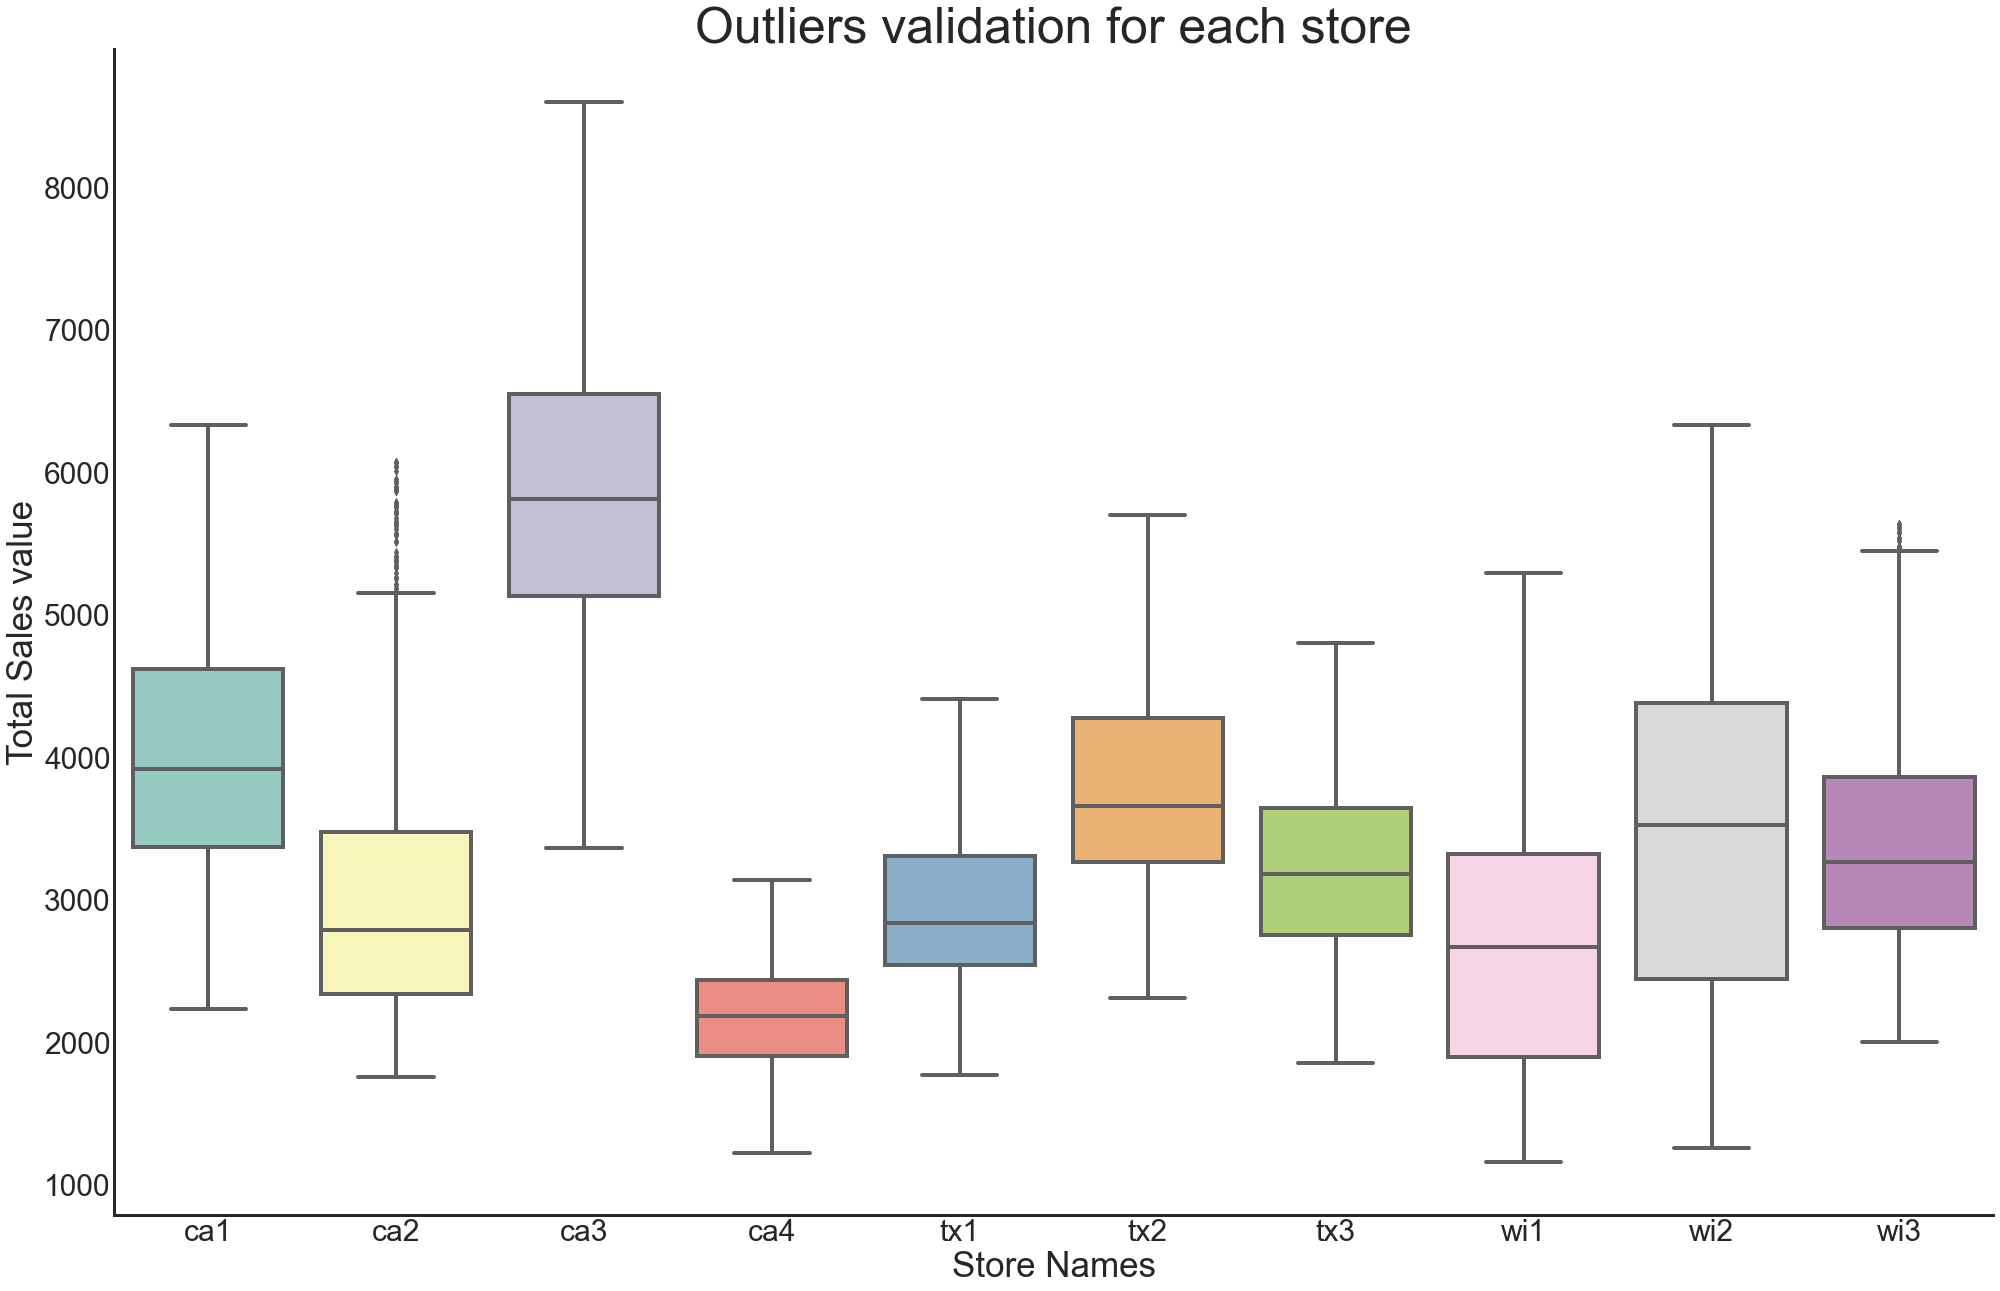

In [47]:
removed_dfs = pd.DataFrame({'ca1': ca1_remove['store_sales'],
                             'ca2': ca2_remove['store_sales'],
                             'ca3': ca3_remove['store_sales'],
                             'ca4': ca4_remove['store_sales'],
                             'tx1': tx1_remove['store_sales'],
                             'tx2': tx2_remove['store_sales'],
                             'tx3': tx3_remove['store_sales'],
                             'wi1': wi1_remove['store_sales'],
                             'wi2': wi2_remove['store_sales'],
                             'wi3': wi3_remove['store_sales']})

sns.set_style('white')
b = sns.boxplot(data= removed_dfs, palette="Set3")
b.axes.set_title("Outliers validation for each store",fontsize=50)
b.set_xlabel("Store Names",fontsize=35)
b.set_ylabel("Total Sales value",fontsize=35)
b.tick_params(labelsize=30)
sns.despine()
plt.show()


In [52]:
import os

outdir = './removed_outliers'
if not os.path.exists(outdir):
    os.mkdir(outdir)

#fullname = os.path.join(outdir, outname)    
ca1_remove.to_csv('removed_outliers/ca1.csv', index = False)
ca2_remove.to_csv('removed_outliers/ca2.csv', index = False)
ca3_remove.to_csv('removed_outliers/ca3.csv', index = False)
ca4_remove.to_csv('removed_outliers/ca4.csv', index = False)
tx1_remove.to_csv('removed_outliers/tx1.csv', index = False)
tx2_remove.to_csv('removed_outliers/tx2.csv', index = False)
tx3_remove.to_csv('removed_outliers/tx3.csv', index = False)
wi1_remove.to_csv('removed_outliers/wi1.csv', index = False)
wi2_remove.to_csv('removed_outliers/wi2.csv', index = False)
wi3_remove.to_csv('removed_outliers/wi3.csv', index = False)